# **OPIM 5770 : Advanced Business Analytics and Project Management(Text Analysis)**
---


The purpose of the text analysis is to gain more information from the pilots’ aspects, which enables us to come up with reasonable and suitable recommendations to solve the business problem. We have collected three different text documents from different places. The First one is from the tweet account @AtlasAirPilot. The second one is from the engagement survey provided by the sponsor already. The last one is from the Glassdoor account @Atlas Air Worldwide.

This section is to import modules that will be used for the analyze text. 

In [98]:
# import modules 
import numpy as np
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [99]:
#mount to the shared drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Tweets analysis
 This section, we will explore all the tweets from the account @AtlasAirPilots to obtain more insights from aspects of pilots. There are 2153 tweets in total. 

In [100]:
#load the dataset from Final Analytics folder of Data used for text analysis folder
#you can upate path to read data here 
df=pd.read_csv('/content/drive/Shareddrives/OPIM 5770-Capstone Class for team 7/Final Analytics/OPIM_5770_Team7 Data used for text analysis/all_tweets.csv')
df

,id,date,tweet
0,1.410010e+18,2021-06-29 23:05:03+00:00,"As of 2 weeks ago 122 pilots resigned, 72 were..."
1,1.409900e+18,2021-06-29 15:45:51+00:00,News is spreading that @AtlasAirWW is parking ...
2,1.405590e+18,2021-06-17 18:12:31+00:00,Does @Amazon dictate the #unionbusting attitud...
3,1.362440e+18,2021-02-18 16:39:35+00:00,$AAWW Earnings Call: Q: Arbitration starts mid...
4,1.045740e+18,2018-09-28 18:31:59+00:00,$DPSGY $AMZN https://t.co/dDvV4Ddpvx
...,...,...,...
2148,1.046840e+18,2018-10-01 19:25:33+00:00,IT'S Q4 @AtlasAirWW $AAWW! Sept with OVER 135 ...
2149,1.046840e+18,2018-10-01 19:02:38+00:00,***ATAM 10/1/18 RELEASED*** An episode so full...
2150,1.046830e+18,2018-10-01 18:36:28+00:00,$AMZN\n\nhttps://t.co/LHKHkccFXI https://t.co/...
2151,1.046830e+18,2018-10-01 18:36:11+00:00,$DPSGY\n\nhttps://t.co/DSz5kfMiBf https://t.co...


In [101]:
# checking missing values and columns info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      2153 non-null   float64
 1   date    2153 non-null   object 
 2   tweet   2153 non-null   object 
dtypes: float64(1), object(2)
memory usage: 50.6+ KB


In [102]:
# convert date column to datetime
df['date']=pd.to_datetime(df['date'])
df.dtypes

id                   float64
date     datetime64[ns, UTC]
tweet                 object
dtype: object

In [103]:
# add a column for month
df['month']=df['date'].dt.month
df.head()

,id,date,tweet,month
0,1.410010e+18,2021-06-29 23:05:03+00:00,"As of 2 weeks ago 122 pilots resigned, 72 were...",6
1,1.409900e+18,2021-06-29 15:45:51+00:00,News is spreading that @AtlasAirWW is parking ...,6
2,1.405590e+18,2021-06-17 18:12:31+00:00,Does @Amazon dictate the #unionbusting attitud...,6
3,1.362440e+18,2021-02-18 16:39:35+00:00,$AAWW Earnings Call: Q: Arbitration starts mid...,2
4,1.045740e+18,2018-09-28 18:31:59+00:00,$DPSGY $AMZN https://t.co/dDvV4Ddpvx,9


## tweets posted in each month 

In [104]:
# only extract tweet and month cloumns from dataframe
tmp=df[['tweet','month']]
tmp

,tweet,month
0,"As of 2 weeks ago 122 pilots resigned, 72 were...",6
1,News is spreading that @AtlasAirWW is parking ...,6
2,Does @Amazon dictate the #unionbusting attitud...,6
3,$AAWW Earnings Call: Q: Arbitration starts mid...,2
4,$DPSGY $AMZN https://t.co/dDvV4Ddpvx,9
...,...,...
2148,IT'S Q4 @AtlasAirWW $AAWW! Sept with OVER 135 ...,10
2149,***ATAM 10/1/18 RELEASED*** An episode so full...,10
2150,$AMZN\n\nhttps://t.co/LHKHkccFXI https://t.co/...,10
2151,$DPSGY\n\nhttps://t.co/DSz5kfMiBf https://t.co...,10


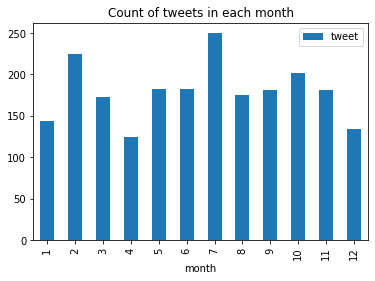

In [105]:
# showing tweets posted in each month
x=tmp.groupby(['month']).count()
x

x.plot.bar(title='Count of tweets in each month')
plt.show()

The most number of tweets are come from July, Feburary and Octorber. 

In addition, July to December has more tweets compared with Janurary to June 

In [106]:
# make everthing lowercase 
df['tweet']=df['tweet'].str.lower()
df.head()

,id,date,tweet,month
0,1.410010e+18,2021-06-29 23:05:03+00:00,"as of 2 weeks ago 122 pilots resigned, 72 were...",6
1,1.409900e+18,2021-06-29 15:45:51+00:00,news is spreading that @atlasairww is parking ...,6
2,1.405590e+18,2021-06-17 18:12:31+00:00,does @amazon dictate the #unionbusting attitud...,6
3,1.362440e+18,2021-02-18 16:39:35+00:00,$aaww earnings call: q: arbitration starts mid...,2
4,1.045740e+18,2018-09-28 18:31:59+00:00,$dpsgy $amzn https://t.co/ddvv4ddpvx,9


In [107]:
# remove any funcky characters with a blank
df['tweet'] =df['tweet'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
df.head()

,id,date,tweet,month
0,1.410010e+18,2021-06-29 23:05:03+00:00,as of weeks ago pilots resigned were first yea...,6
1,1.409900e+18,2021-06-29 15:45:51+00:00,news is spreading that atlasairww is parking a...,6
2,1.405590e+18,2021-06-17 18:12:31+00:00,does amazon dictate the unionbusting attitude ...,6
3,1.362440e+18,2021-02-18 16:39:35+00:00,aaww earnings call q arbitration starts midmar...,2
4,1.045740e+18,2018-09-28 18:31:59+00:00,dpsgy amzn httpstcoddvvddpvx,9


In [108]:
# remove some words, such as aaww,atlasairww,u, pilots, polits,yor, yu 
# becuse they are so often appreace in the tweets, don't provide insights 
df['tweet'] =df['tweet'].str.replace('aaww','')
df['tweet'] =df['tweet'].str.replace('atlasairww','')
df['tweet'] =df['tweet'].str.replace('pilots','')
df['tweet'] =df['tweet'].str.replace('pilot','')
df['tweet'] =df['tweet'].str.replace('atlas','')
df['tweet'] =df['tweet'].str.replace('u','')
df['tweet'] =df['tweet'].str.replace('yor','')
df['tweet'] =df['tweet'].str.replace('yo','')

In [109]:
# check my work
print(df['tweet'][0])
print(df['tweet'][1])
print(df['tweet'][2])

as of weeks ago  resigned were first year when  can make more have better working conditions at another airline why stay before pandemic  coldnt fill  seats stock was in teens and flights were canceled history repeats  httpstcoovlmago
news is spreading that  is parking airplanes de to shortage of   cant move cargo wo  who are leaving  for other airlines offering better compensation only to get worse cmroberson lesliejosephs air_cargo_news were researching more info
does amazon dictate the nionbsting attitde  or does  s bosses do it on their own not willing to bargain in good faith over the last years is a great example of disrespecting the  who fly the planes amazon has been  for years hmm


## stop words 

In [110]:
import nltk 
from nltk.corpus import stopwords

In [111]:
nltk.download('stopwords')
print(stopwords.words('english'))

stop=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [112]:
df.head() # note how the stop words have been removed
df["tweet"] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) 
df.head()

,id,date,tweet,month
0,1.410010e+18,2021-06-29 23:05:03+00:00,weeks ago resigned first year make better work...,6
1,1.409900e+18,2021-06-29 15:45:51+00:00,news spreading parking airplanes de shortage c...,6
2,1.405590e+18,2021-06-17 18:12:31+00:00,amazon dictate nionbsting attitde bosses willi...,6
3,1.362440e+18,2021-02-18 16:39:35+00:00,earnings call q arbitration starts midmarch ex...,2
4,1.045740e+18,2018-09-28 18:31:59+00:00,dpsgy amzn httpstcoddvvddpvx,9


## text EDA

In [113]:
# common words

# and we can make a frequency plot 
# we'll group, then convert to pandas DataFrame for easy plotting
x = df['tweet'].str.split(expand=True).stack().value_counts()
x = pd.DataFrame(x)
# reset the index
x.reset_index(inplace=True)
# rename the columns
x.rename(columns={x.columns[0]:'word', x.columns[1]:'frequency'}, inplace=True)
x.head(10)

,word,frequency
0,fpm,562
1,shameon,353
2,amazon,209
3,teamsters,193
4,amp,189
5,new,161
6,indstry,152
7,cba,148
8,contract,147
9,amzn,120


In [114]:
# download the dataframe
x.to_csv('Twitter common words.csv',index=False)

In [115]:
# most common words 
myTable = df['tweet'].str.split(expand=True).stack().value_counts()
myTable[0:20] # first 20 words come out 

fpm          562
shameon      353
amazon       209
teamsters    193
amp          189
new          161
indstry      152
cba          148
contract     147
amzn         120
atam         116
abot         106
dhls          98
get           95
time          95
air           90
pay           89
sothern       86
ot            84
local         82
dtype: int64

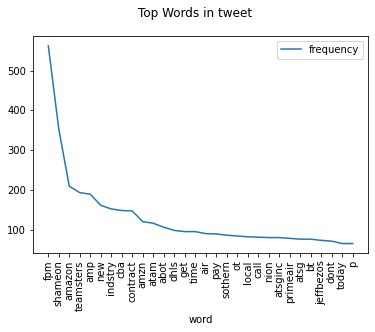

In [116]:
# common words as a plot
# Frequency Distribution Plot

x = x[0:30] # to view first 30 common words
x.plot(x='word', y='frequency')
plt.xticks(np.arange(len(x)), x['word'], rotation=90)
plt.suptitle('Top Words in tweet')
plt.show()

## Word Cloud 

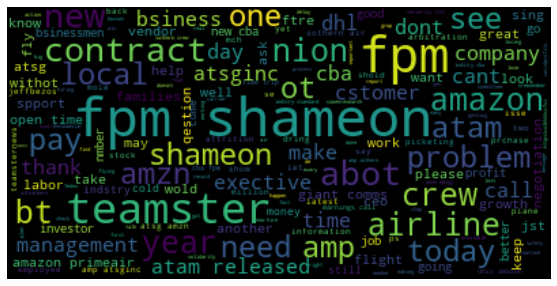

In [117]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(' '.join(df['tweet']))


# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(' '.join(df['tweet']))
plt.figure(figsize=(15,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



*   Generally speaking, tweets are negetive. 
*   The most frequent words come out are: payment, amazon, contract. 


*   Not sure why they mention amazon so many time.(maybe amazon is one of them clients, and some confilcts between amazon and pilots ?)






# Engagement survey analysis 
This section, we will expolre engament survery that sponsor provided to see any new insights may exists. 

In [118]:
#load the dataset from Final Analytics folder of Data used for text analysis folder
#you can upate path to read data here 
df1=pd.read_excel('/content/drive/Shareddrives/OPIM 5770-Capstone Class for team 7/Final Analytics/OPIM_5770_Team7 Data used for text analysis/Engagement Survey 2021 - Scheduling EXAMPLES.xlsx')
df1

,Question,Comment,Rating,Topic 1,Topic 2,Sentiment,EmployeeType,Month
0,Work schedules are fairly allocated among peop...,Fairly? There is limited advantage given to se...,Strongly disagree,Career,NaN,Neutral,Crew,Apr - 2021
1,Changes in my work schedule are effectively ma...,The changes to schedule very haphazard and sol...,Strongly disagree,Work Life,NaN,Negative,Crew,May - 2021
2,Changes in my work schedule are effectively ma...,My schedule does not seem to managed at all wh...,Strongly disagree,Work Life,NaN,Negative,Crew,Apr - 2021
3,Changes in my work schedule are effectively ma...,There are frequent changes that negatively aff...,Disagree,Autonomy,Work Life,Negative,Crew,Apr - 2021
4,Changes in my work schedule are effectively ma...,"I appreciate the nature of our business, but t...",Neither agree or disagree,Work Life,NaN,Neutral,Crew,May - 2021
...,...,...,...,...,...,...,...,...
68,Are there some things we are not doing so grea...,Schedules! Schedule changes! (we're not robots...,Not rated,Systems & Resources,NaN,Negative,Crew,May - 2021
69,Are there some things we are not doing so grea...,Schedules seem inefficient and lack opportunit...,Not rated,Systems & Resources,NaN,Negative,Crew,Apr - 2021
70,Are there some things we are not doing so grea...,Efficiency at work. Fly us more in less days....,Not rated,Company Performance,NaN,Negative,Crew,Apr - 2021
71,Are there some things we are doing great here?,Flexible scheduling and travel.,Not rated,Work Life,NaN,Positive,Crew,May - 2021


In [119]:
nltk.download('stopwords')
print(stopwords.words('english'))

stop=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [120]:
# make everthing lowercase 
df1['Comment']=df1['Comment'].str.lower()
df1.head()

,Question,Comment,Rating,Topic 1,Topic 2,Sentiment,EmployeeType,Month
0,Work schedules are fairly allocated among peop...,fairly? there is limited advantage given to se...,Strongly disagree,Career,NaN,Neutral,Crew,Apr - 2021
1,Changes in my work schedule are effectively ma...,the changes to schedule very haphazard and sol...,Strongly disagree,Work Life,NaN,Negative,Crew,May - 2021
2,Changes in my work schedule are effectively ma...,my schedule does not seem to managed at all wh...,Strongly disagree,Work Life,NaN,Negative,Crew,Apr - 2021
3,Changes in my work schedule are effectively ma...,there are frequent changes that negatively aff...,Disagree,Autonomy,Work Life,Negative,Crew,Apr - 2021
4,Changes in my work schedule are effectively ma...,"i appreciate the nature of our business, but t...",Neither agree or disagree,Work Life,NaN,Neutral,Crew,May - 2021


In [121]:
# remove 'I' in text
df1['Comment'] =df1['Comment'].str.replace('I','')

In [122]:
df1.head() # note how the stop words have been removed
df1["Comment"] = df1['Comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) 
df1.head()

,Question,Comment,Rating,Topic 1,Topic 2,Sentiment,EmployeeType,Month
0,Work schedules are fairly allocated among peop...,fairly? limited advantage given seniority bidd...,Strongly disagree,Career,NaN,Neutral,Crew,Apr - 2021
1,Changes in my work schedule are effectively ma...,changes schedule haphazard solutions same. see...,Strongly disagree,Work Life,NaN,Negative,Crew,May - 2021
2,Changes in my work schedule are effectively ma...,schedule seem managed comes circadian rhythms....,Strongly disagree,Work Life,NaN,Negative,Crew,Apr - 2021
3,Changes in my work schedule are effectively ma...,frequent changes negatively affect pay & quali...,Disagree,Autonomy,Work Life,Negative,Crew,Apr - 2021
4,Changes in my work schedule are effectively ma...,"appreciate nature business, schedule changes t...",Neither agree or disagree,Work Life,NaN,Neutral,Crew,May - 2021


## Text EDA

In [123]:
# common words

# and we can make a frequency plot 
# we'll group, then convert to pandas DataFrame for easy plotting
x = df1['Comment'].str.split(expand=True).stack().value_counts()
x = pd.DataFrame(x)
# reset the index
x.reset_index(inplace=True)
# rename the columns
x.rename(columns={x.columns[0]:'word', x.columns[1]:'frequency'}, inplace=True)
x.head(10)

,word,frequency
0,days,29
1,schedule,28
2,seniority,22
3,work,20
4,schedules,16
5,lines,15
6,bid,15
7,changes,14
8,would,13
9,scheduling,11


In [124]:
# most common words 
myTable = df1['Comment'].str.split(expand=True).stack().value_counts()
myTable[0:30] # first 30 words come out 

days          29
schedule      28
seniority     22
work          20
schedules     16
lines         15
bid           15
changes       14
would         13
scheduling    11
make          11
time          11
crew          11
get           10
pay            9
need           9
means          9
system         9
pilots         9
life           8
pilot          7
17             7
hour           7
amount         7
many           7
like           6
always         6
usually        6
trips          6
less           6
dtype: int64

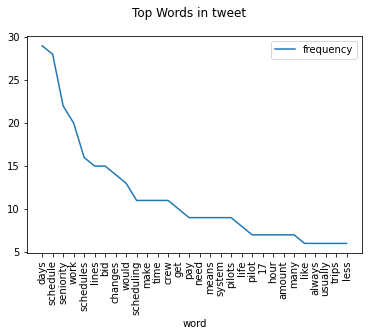

In [125]:
# common words as a plot
# Frequency Distribution Plot

x = x[0:30] # to view first 30 common words
x.plot(x='word', y='frequency')
plt.xticks(np.arange(len(x)), x['word'], rotation=90)
plt.suptitle('Top Words in tweet')
plt.show()

## Word Cloud

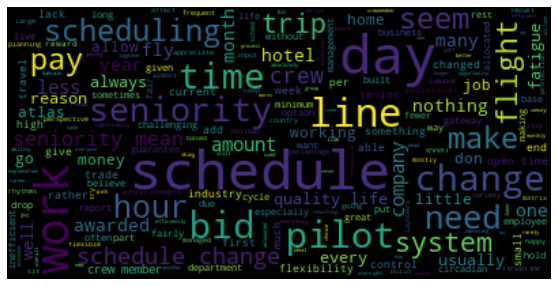

In [126]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(' '.join(df1['Comment']))


# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(' '.join(df1['Comment']))
plt.figure(figsize=(15,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



*   The most frequent word is schedule, senority, work, biding and changes. 


*   Payment is also mentioned, but it wasn't in top five words. 






# Glassdoor reviews 

In [127]:
#load the dataset from Final Analytics folder of Data used for text analysis folder
#you can upate path to read data here 
df2=pd.read_excel('/content/drive/Shareddrives/OPIM 5770-Capstone Class for team 7/Final Analytics/OPIM_5770_Team7 Data used for text analysis/Glassdoor Reviews.xlsx')
df2

,Position,Review Date,Pros,Cons,Ratings
0,"Pilot in Anchorage, AK",2021-08-19 00:00:00,Potential long stretches' of days off if your ...,"These don't happen every day, but definitely d...",0
1,"Pilot, First Officer in Anchorage, AK",16 Aug 2021,Atlas buys you a ticket to go and return from ...,Training is tough! Training pay is $1600/month...,0
2,Airline Pilot,28 Jul 2021,Exciting travel and challenging flying through...,The pay is half what other side body pilots ea...,0
3,"Airline Pilot in Niceville, FL",2021-06-24 00:00:00,"worldwide travel opportunities, gate-way trave...",Management is oppressive and greedy,0
4,"Pilot in Purchase, NY",21 May 2021 -,Time off and a big plane,"Pay, management, union leadership, training an...",0
5,Pilot,2020-09-01 00:00:00,"Operation, schedule, aircraft, maintenance, la...","Pay, company unwilling to negotiate fairly, tr...",0
6,"Pilot - First Officer in Miami, FL",25 Aug 2020,Great professional Team Very thorough on the j...,Long monthly schedules away from home,0
7,"Airline Pilot in Cincinnati, OH",21 Jul 2020,"Layovers, paid travel to work, money improving",To many days worked in the month,0
8,"Pilot in Anchorage, AK",2020-03-14 00:00:00,Eventually the heavy cargo planes will be remo...,Hostile work environment. Would rather park ai...,0
9,"Pilot in Cincinnati, OH",2019-08-18 00:00:00,The company will most likely be out of busines...,"Hostile work environment, racist management, d...",0


In [128]:
nltk.download('stopwords')
print(stopwords.words('english'))

stop=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [129]:
# remove any funcky characters with a blank
df2['Pros'] =df2['Pros'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
df2['Cons'] =df2['Cons'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
df2.head()

,Position,Review Date,Pros,Cons,Ratings
0,"Pilot in Anchorage, AK",2021-08-19 00:00:00,Potential long stretches of days off if your s...,These dont happen every day but definitely do ...,0
1,"Pilot, First Officer in Anchorage, AK",16 Aug 2021,Atlas buys you a ticket to go and return from ...,Training is tough Training pay is month plus p...,0
2,Airline Pilot,28 Jul 2021,Exciting travel and challenging flying through...,The pay is half what other side body pilots ea...,0
3,"Airline Pilot in Niceville, FL",2021-06-24 00:00:00,worldwide travel opportunities gateway travel ...,Management is oppressive and greedy,0
4,"Pilot in Purchase, NY",21 May 2021 -,Time off and a big plane,Pay management union leadership training and o...,0


In [130]:
# remove some words, such as pilots, pilot, atlas
# becuase these words don't helpful 
df2['Cons'] =df2['Cons'].str.replace('pilots','')
df2['Cons'] =df2['Cons'].str.replace('pilot','')
df2['Cons'] =df2['Cons'].str.replace('atlas','')

In [131]:
# make everthing lowercase 
df2['Pros']=df2['Pros'].str.lower()
df2['Cons']=df2['Cons'].str.lower()
df1.head()

,Question,Comment,Rating,Topic 1,Topic 2,Sentiment,EmployeeType,Month
0,Work schedules are fairly allocated among peop...,fairly? limited advantage given seniority bidd...,Strongly disagree,Career,NaN,Neutral,Crew,Apr - 2021
1,Changes in my work schedule are effectively ma...,changes schedule haphazard solutions same. see...,Strongly disagree,Work Life,NaN,Negative,Crew,May - 2021
2,Changes in my work schedule are effectively ma...,schedule seem managed comes circadian rhythms....,Strongly disagree,Work Life,NaN,Negative,Crew,Apr - 2021
3,Changes in my work schedule are effectively ma...,frequent changes negatively affect pay & quali...,Disagree,Autonomy,Work Life,Negative,Crew,Apr - 2021
4,Changes in my work schedule are effectively ma...,"appreciate nature business, schedule changes t...",Neither agree or disagree,Work Life,NaN,Neutral,Crew,May - 2021


In [132]:
df2.head() # note how the stop words have been removed
df2["Pros"] = df2['Pros'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) 
df2["Cons"] = df2['Cons'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) 
df2.head()

,Position,Review Date,Pros,Cons,Ratings
0,"Pilot in Anchorage, AK",2021-08-19 00:00:00,potential long stretches days seniority bid fr...,dont happen every day definitely happen extrem...,0
1,"Pilot, First Officer in Anchorage, AK",16 Aug 2021,atlas buys ticket go return work provide hotel...,training tough training pay month plus per die...,0
2,Airline Pilot,28 Jul 2021,exciting travel challenging flying every corne...,pay half side body earn union plagued incompet...,0
3,"Airline Pilot in Niceville, FL",2021-06-24 00:00:00,worldwide travel opportunities gateway travel ...,management oppressive greedy,0
4,"Pilot in Purchase, NY",21 May 2021 -,time big plane,pay management union leadership training overa...,0


## Text EDA for Pros 

In [133]:
# common words for Pros

# and we can make a frequency plot 
# we'll group, then convert to pandas DataFrame for easy plotting
x = df2['Pros'].str.split(expand=True).stack().value_counts()
x = pd.DataFrame(x)
# reset the index
x.reset_index(inplace=True)
# rename the columns
x.rename(columns={x.columns[0]:'word', x.columns[1]:'frequency'}, inplace=True)
x.head(10)

,word,frequency
0,travel,11
1,company,7
2,flying,5
3,nice,5
4,better,4
5,class,4
6,great,4
7,time,4
8,good,4
9,international,4


In [134]:
# most common words 
myTable = df2['Pros'].str.split(expand=True).stack().value_counts()
myTable[0:30] # first 30 words come out 

travel           11
company           7
flying            5
nice              5
better            4
class             4
great             4
time              4
good              4
international     4
gateway           4
challenging       3
much              3
business          3
aircraft          3
department        3
pilots            3
layovers          3
airline           3
excellent         2
traveling         2
opportunities     2
worldwide         2
cargo             2
money             2
moral             2
get               2
hotel             2
generally         2
unique            2
dtype: int64

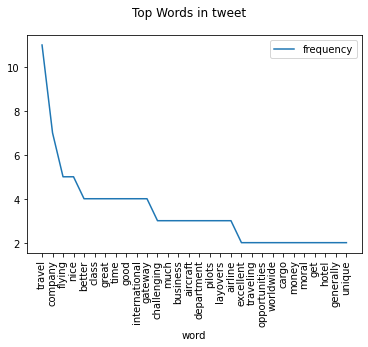

In [135]:
# common words as a plot
# Frequency Distribution Plot

x = x[0:30] # to view first 30 common words
x.plot(x='word', y='frequency')
plt.xticks(np.arange(len(x)), x['word'], rotation=90)
plt.suptitle('Top Words in tweet')
plt.show()

## Word Cloud for Pros 

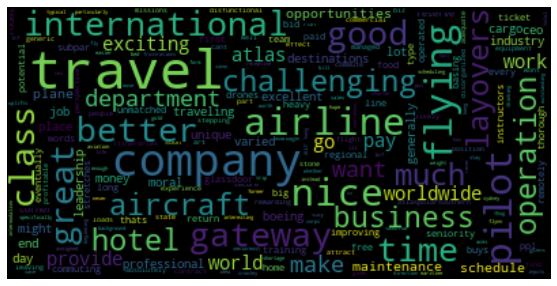

In [136]:
# Generate a word cloud image
wordcloud = WordCloud().generate(' '.join(df2['Pros']))


# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(' '.join(df2['Pros']))
plt.figure(figsize=(15,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



*   The most frequent words are travel, international, flying and gateway. 

*  we consider advantages of Atlas are:


1.   Great place to see world (since its footprint across Europe, Asia, North America, South America)
2.   Good opportunities to engage with different fleet type 



*  We consider those advantages can be used to attract certain demographics when Altas are hiring new pilots






## Text EDA for Cons

In [137]:
# common words for Pros

# and we can make a frequency plot 
# we'll group, then convert to pandas DataFrame for easy plotting
x = df2['Cons'].str.split(expand=True).stack().value_counts()
x = pd.DataFrame(x)
# reset the index
x.reset_index(inplace=True)
# rename the columns
x.rename(columns={x.columns[0]:'word', x.columns[1]:'frequency'}, inplace=True)
x.head(10)

,word,frequency
0,company,19
1,pay,12
2,training,11
3,go,11
4,days,11
5,get,11
6,atlas,11
7,management,10
8,would,9
9,employees,8


In [138]:
# download the dataframe
x.to_csv('Cons of Glassdoor common words.csv',index=False)

In [139]:
# most common words 
myTable = df2['Cons'].str.split(expand=True).stack().value_counts()
myTable[0:30] # first 30 words come out 

company       19
pay           12
training      11
go            11
days          11
get           11
atlas         11
management    10
would          9
employees      8
elsewhere      8
rather         8
every          7
make           7
many           7
want           7
months         6
year           6
industry       6
day            6
much           6
paid           6
aircraft       5
contract       5
travel         5
long           5
wages          5
fly            5
dont           5
expenses       4
dtype: int64

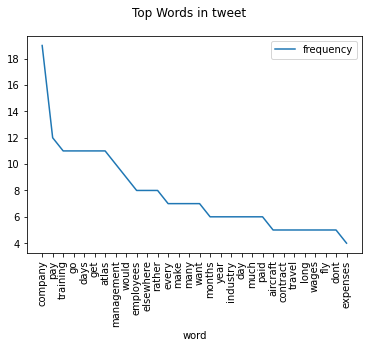

In [140]:
# common words as a plot
# Frequency Distribution Plot

x = x[0:30] # to view first 30 common words
x.plot(x='word', y='frequency')
plt.xticks(np.arange(len(x)), x['word'], rotation=90)
plt.suptitle('Top Words in tweet')
plt.show()

## Word Cloud for Cons

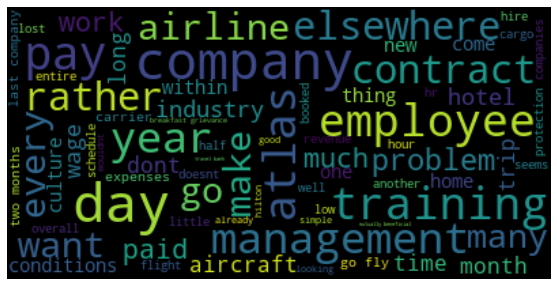

In [141]:
# Generate a word cloud image
wordcloud = WordCloud().generate(' '.join(df2['Cons']))


# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(' '.join(df2['Cons']))
plt.figure(figsize=(15,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



*   Disadvantages from aspect of pilots: payment,company management issues, training and contract. 
*   Training was mentioned here, we guess there are some problems in training sessions. 



# Conclusion 


*   Payment is mentioned crossing all three documents.


*   Contract, company management issues are mentioned from Tweet and Glassdoors

*   Amazon and DHL are mentioned in Tweet texts. We consider there may be exist conflicts between clients and pilots.



*   Through analyzing engagement surveys, schedule changes bring challenges to pilots. In addition, seniority and bidding process may also make them unsatisfied.

*   After looking at the pros of Glassdoor reviews, pilots consider that international travel and having an opportunity to engage with different fleet types are advantageous.




